In [105]:
# just a few notes

* ellipse centered at $(x_0, y_0)$: $\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2}$ = 1
 * parabola with lowest point $(x_0, y_0)$: $y = a(x - x_0)^2 + y_0$
    * another form, called standard form: $y = ax^2 + bx + c$
    * more about parabolas: https://www.khanacademy.org/math/precalculus/conics-precalc/focus-and-directrix-of-a-parabola/v/focus-and-directrix-introduction
* hyperbola: $\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1$

In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)


# mStar is the mass of the central star, rStar is the *vector*
#  from planet to mass of star
def calcAcc(mStar, rStar):
    mag_r = (rStar[0]**2 + rStar[1]**2)**0.5
    mag_a = -G*mStar/mag_r**2
    #mag_a = -G*mStar/mag_r**2 - 10000000000000*G*mStar/mag_r**3
    #mag_a = -G*mStar/mag_r**1.9
    # how about direction?  It's along rStar
    #  but we need to make sure this direction
    #  vector is a "hat" i.e. a unit vector
    # We want the direction only:
    unitVector = rStar/mag_r
    return mag_a*unitVector


# for 2 body

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)

r

array([[ 1.49600000e+13,  2.21806012e+10],
       [ 1.49599760e+13,  4.43612025e+10],
       [ 1.49599281e+13,  6.65417682e+10],
       ...,
       [-1.31727570e+13,  2.42567063e+13],
       [-1.31863845e+13,  2.42554923e+13],
       [-1.32000086e+13,  2.42542721e+13]])

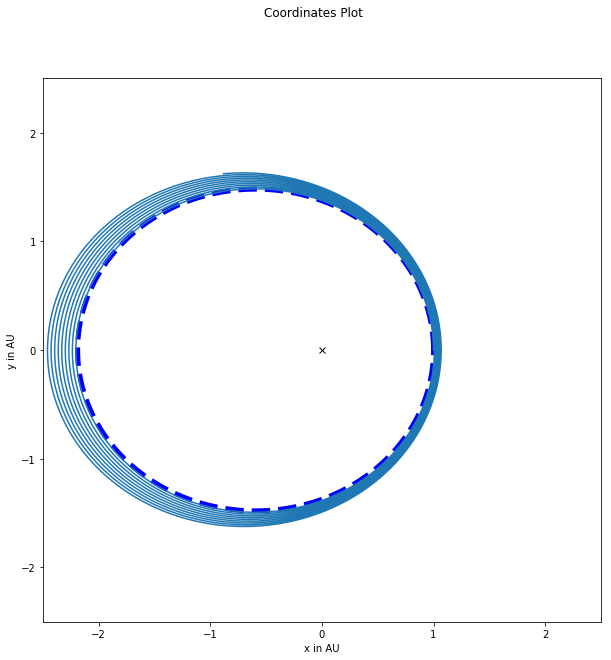

In [32]:
# now, generate the theta array
ntheta = 500 # number of points for theta
th_an = np.linspace(0, 360, ntheta)

# now, create r(theta)
r_an = (a*(1-ecc*ecc))/(1.0 + ecc*np.cos( th_an*np.pi/180.0 ))

# for plotting -> x/y coords for m2
x_an = r_an*np.cos( th_an*np.pi/180.0 )/AUinCM
y_an = r_an*np.sin( th_an*np.pi/180.0 )/AUinCM

# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(x_an, y_an, 'b--', linewidth=5)
ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

In [108]:
# for efficiency
# ecc is unitless, Tplanet in years
def plot_orbits(eccPlanet, Tplanet, delta_t_frac = 0.0001, n_orbits=10):
    # years -> seconds
    Tplanet *= 365*24*60*60.
    
    # use T to find a
    a = ( Tplanet**2*G*mass_of_star/(4*np.pi**2))**(1./3.)
    # use a to find rp
    rp = a*(1-eccPlanet)
    # use rp and ecc to get vp
    vp = np.sqrt( G*mass_of_star*(1+eccPlanet)/rp )
    
    # do what we did before
    r_0 = np.array([rp, 0])
    v_0 = np.array([0, vp])

    delta_t = Tplanet*delta_t_frac

    #n_steps = int(np.round(Porb/delta_t))*n_orbits
    n_steps = int(np.round(1./delta_t_frac))*n_orbits

    ri = r_0
    vi = v_0

    r = []
    for i in range(n_steps):
        # use function to grab ag
        ag = calcAcc(mass_of_star, ri)
        ri1 = ri + vi*delta_t
        vi1 = vi + ag*delta_t

        # append to r vector
        r.append(ri1)

        # replace stuff
        ri = ri1
        vi = vi1

    # what does it look like?
    r = np.array(r)

    # now, create r(theta)
    r_an = (a*(1-ecc*ecc))/(1.0 + ecc*np.cos( th_an*np.pi/180.0 ))

    # for plotting -> x/y coords for m2
    x_an = r_an*np.cos( th_an*np.pi/180.0 )/AUinCM
    y_an = r_an*np.sin( th_an*np.pi/180.0 )/AUinCM

    # plot x/y coords
    fig, ax = plt.subplots(1, figsize = (10, 10))
    fig.suptitle('Coordinates Plot')

    ax.plot(x_an, y_an, 'b--', linewidth=5)
    ax.plot(0.0, 0.0, 'kx')
    ax.set_xlabel('x in AU')
    ax.set_ylabel('y in AU')

    ax.set_xlim(-2.5*rp/AUinCM, 2.5*rp/AUinCM)
    ax.set_ylim(-2.5*rp/AUinCM, 2.5*rp/AUinCM)

    # plot Euler's solution
    ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

    plt.show()

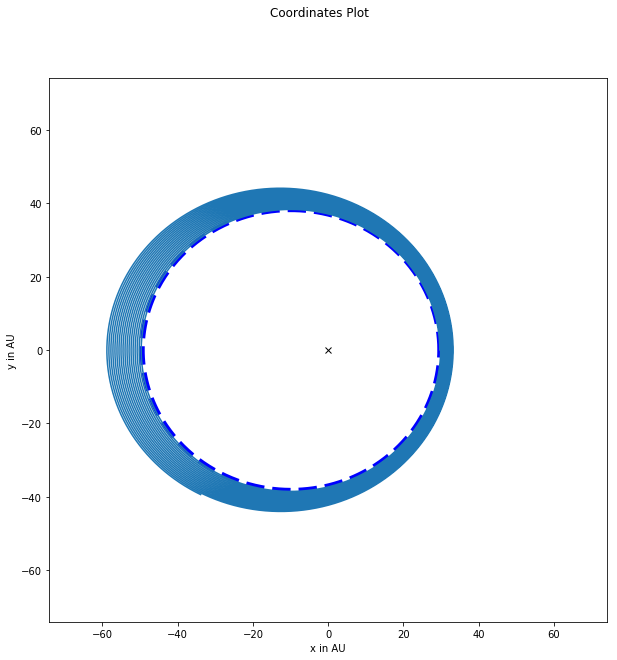

In [109]:
#for earth
ecc = 0.02
T = 1.0 # year

# pluto
ecc = 0.25
T = 248.0 # years

plot_orbits(ecc, T, delta_t_frac=0.0001, n_orbits=20)

### for full 2b

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

In [111]:
# in solar masses
#M1 = 1.0
M1 = 0.0009
M2 = 1.0

In [112]:
rp = 1.0 # in AU 
vp = 35.0 # in km/s

In [113]:
M1 = M1*MassOfSun
M2 = M2*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

In [114]:
def calcAcc(mj, ri, rj):
    mag_r = np.sqrt( (ri[0]-rj[0])**2 \
                    +(ri[1]-rj[1])**2 )# \
                    #+(ri[2]-rj[2])**2 )
    mag_a = -G*mj/mag_r**2
    # unit vector points from particle 1 -> particle 2
    unitVector = (ri - rj)/mag_r
    # return
    return mag_a*unitVector


In [115]:
# our initial arrays are now 2D and in 2D!
#r_0 = np.array([np.array([rp, 0]), np.array([0, 0])])
#v_0 = np.array([np.array([0, vp]), np.array([0, 0])])

r_0 = np.array([[rp, 0], [0, 0]])
v_0 = np.array([[0, vp], [0, 0]])

#((r_0[1,:]-r_0[0,:])**2).sum()

In [116]:
# let's try to estimate how many steps we might need

# we can estimate a ~ initial distance 
a = np.sqrt( ((r_0[0,:]-r_0[1,:])**2).sum() )

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(M1+M2)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

In [117]:
ri = r_0
vi = v_0

r = [r_0]
for i in range(n_steps):
    # use function to grab ag on particle 1
    ag1 = calcAcc(M2, ri[0,:], ri[1,:])
    ag2 = calcAcc(M1, ri[1,:], ri[0,:])
    
    # for ease, let's create a acceleration vector
    ag = np.array([ag1, ag2])
    
    # update new position and velocity
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


In [118]:
r[:,0]

array([[ 1.49600000e+13,  0.00000000e+00],
       [ 1.49600000e+13,  1.10088476e+10],
       [ 1.49599941e+13,  2.20176952e+10],
       ...,
       [ 5.92692671e+11, -1.97731452e+13],
       [ 6.00611048e+11, -1.97699211e+13],
       [ 6.08529339e+11, -1.97666939e+13]])

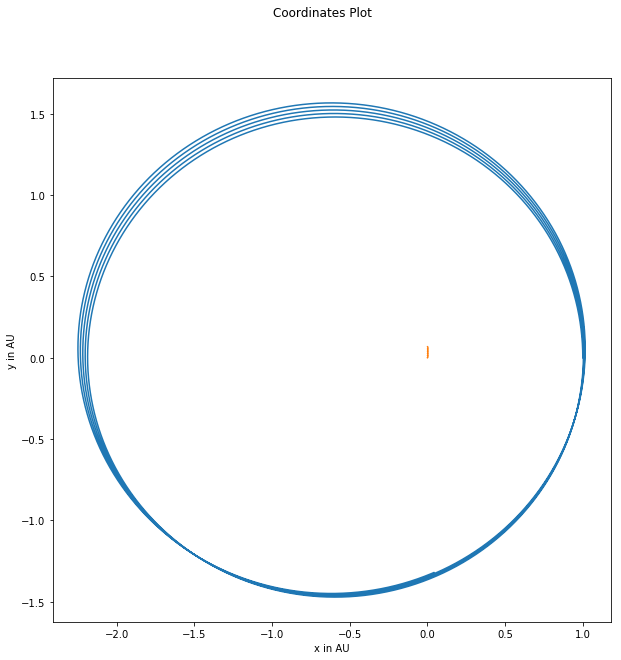

In [119]:
# let's plot!
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

# plot Euler's solution, particle 1
ax.plot(r[:,0,0]/AUinCM, r[:,0,1]/AUinCM)

# particle 2
ax.plot(r[:,1,0]/AUinCM, r[:,1,1]/AUinCM)


plt.show()

### For plotting L and E

In [121]:
# energy
def calcE(m1, m2, r1, r2, v1, v2):
    mag_r = np.sqrt( (r1-r2).dot(r1-r2) )
    return 0.5*(m1*v1.dot(v1) + m2*v2.dot(v2)) - G*m1*m2/mag_r

# angular momentum
def calcL(m1, m2, r1, r2, v1, v2):
    #print(r1, v1, np.cross(r1,v1))
    L = m1*np.cross(r1,v1) + m2*np.cross(r2,v2)
    #mag_L = np.sqrt( L.dot(L) )
    # for 2D
    mag_L = np.sqrt(L*L)
    return mag_L


In [134]:
ri = r_0
vi = v_0

In [135]:

# initial value
r = [r_0]
E = [calcE(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])]
L = [calcL(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])]
t = [0] # time = 0

for i in range(n_steps):
    # use function to grab ag on particle 1
    ag1 = calcAcc(M2, ri[0,:], ri[1,:])
    ag2 = calcAcc(M1, ri[1,:], ri[0,:])
    
    # for ease, let's create a acceleration vector
    ag = np.array([ag1, ag2])
    
    # update new position and velocity
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # add E, L, t
    t.append(t[-1]+delta_t)
    newE = calcE(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])
    newL = calcL(M1,M2, ri[0,:], ri[1,:], vi[0,:],vi[1,:])
    E.append(newE)
    L.append(newL)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)


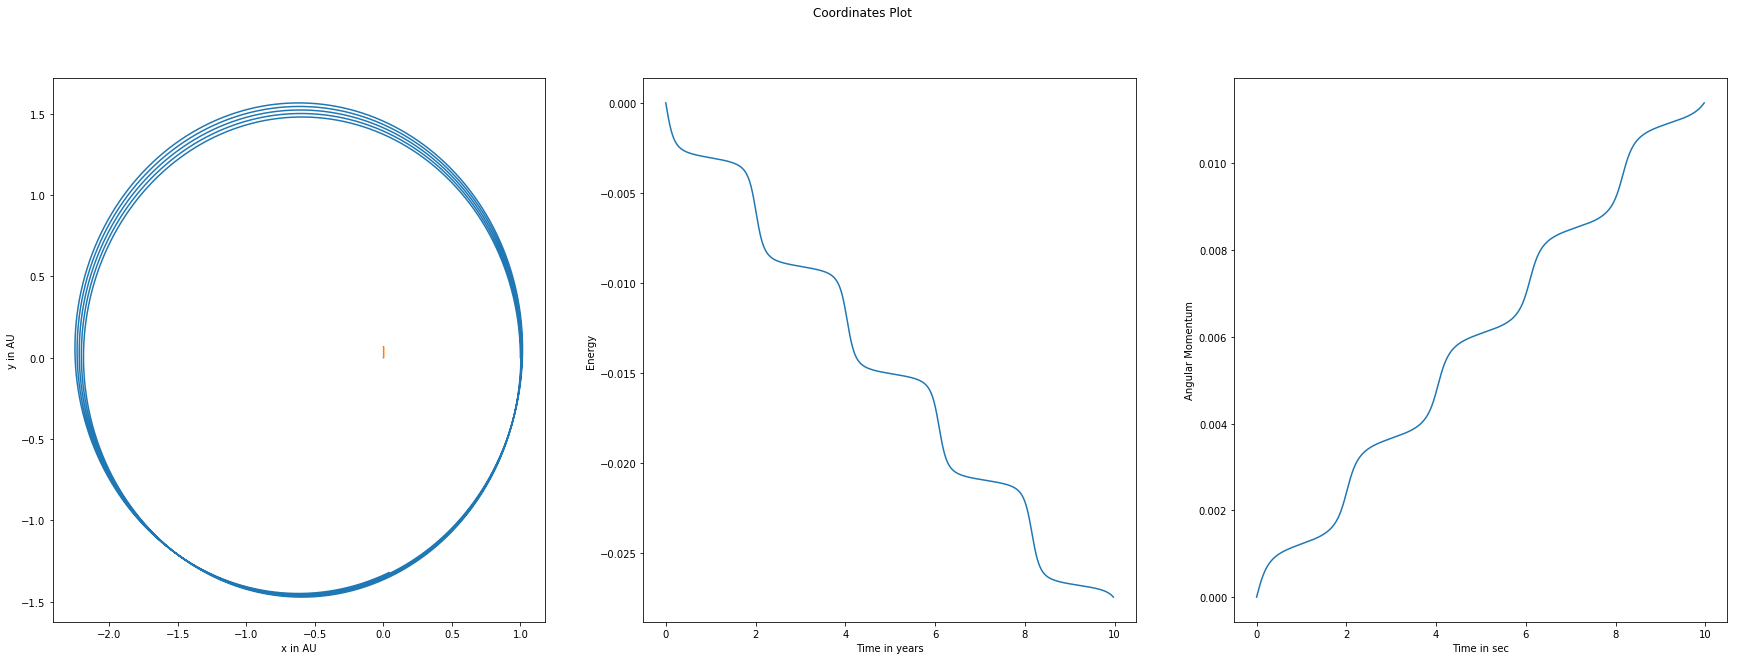

In [136]:
# let's plot!
fig, ax = plt.subplots(1, 3, figsize = (10*3, 10))
fig.suptitle('Coordinates Plot')

ax[0].set_xlabel('x in AU')
ax[0].set_ylabel('y in AU')

# plot Euler's solution, particle 1
ax[0].plot(r[:,0,0]/AUinCM, r[:,0,1]/AUinCM)

# particle 2
ax[0].plot(r[:,1,0]/AUinCM, r[:,1,1]/AUinCM)

# analysis plots
#ax[1].plot(t, E)
#ax[1].set_xlabel('Time in sec')
#ax[1].set_ylabel('Energy')

#ax[2].plot(t, L)
#ax[2].set_xlabel('Time in sec')
#ax[2].set_ylabel('Angular Momentum')

# in percentages
startE = E[0]; startL = L[0]
E = (E - E[0])/startE
L = (L - L[0])/startL
t = np.array(t)/(365*24*60*60.)
ax[1].plot(t, E)
ax[1].set_xlabel('Time in years')
ax[1].set_ylabel('Energy')

ax[2].plot(t, L)
ax[2].set_xlabel('Time in sec')
ax[2].set_ylabel('Angular Momentum')


plt.show()

# Hermite solver